# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
# silence NumbaPerformanceWarning
import warnings
from numba.errors import NumbaPerformanceWarning
warnings.filterwarnings("ignore", category=NumbaPerformanceWarning)

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load FL neut myeloid

In [4]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/liver/data/fetal_liver_alladata_Copy1.h5ad")

In [5]:
adata.raw = adata

In [6]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
B cell                            1079
DC1                                336
DC2                               3954
DC precursor                       330
Early Erythroid                  11985
Early lymphoid_T lymphocyte        767
Endothelial cell                  3348
Fibroblast                        1713
HSC_MPP                           3439
Hepatocyte                        2479
ILC precursor                     1726
Kupffer Cell                     24841
Late Erythroid                    3180
MEMP                              1342
Mast cell                         1308
Megakaryocyte                     3983
Mid Erythroid                    27000
Mono-Mac                          6590
Monocyte                          2586
Monocyte precursor                 350
NK                                6706
Neutrophil-myeloid progenitor      658
Pre pro B cell                     234
VCAM1+ EI macrophage               161
pDC precursor                      253
pre-B cell   

In [7]:
adata.shape

(113063, 27080)

In [8]:
myeloid_celltypes = ["Monocyte precursor", "Neutrophil-myeloid progenitor"]

In [9]:
adata = adata[adata.obs['cell.labels'].isin(myeloid_celltypes)].copy()

In [10]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
Monocyte precursor               350
Neutrophil-myeloid progenitor    658
dtype: int64

In [11]:
adata.shape

(1008, 27080)

# Pre-process the dataset

In [12]:
# normalise count data 
sc.pp.normalize_total(adata)

In [13]:
# log the count data 
sc.pp.log1p(adata)

In [14]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [15]:
# scale the data 
sc.pp.scale(adata, max_value=10)

In [16]:
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

In [17]:
# run pca
sc.tl.pca(adata, n_comps=50)

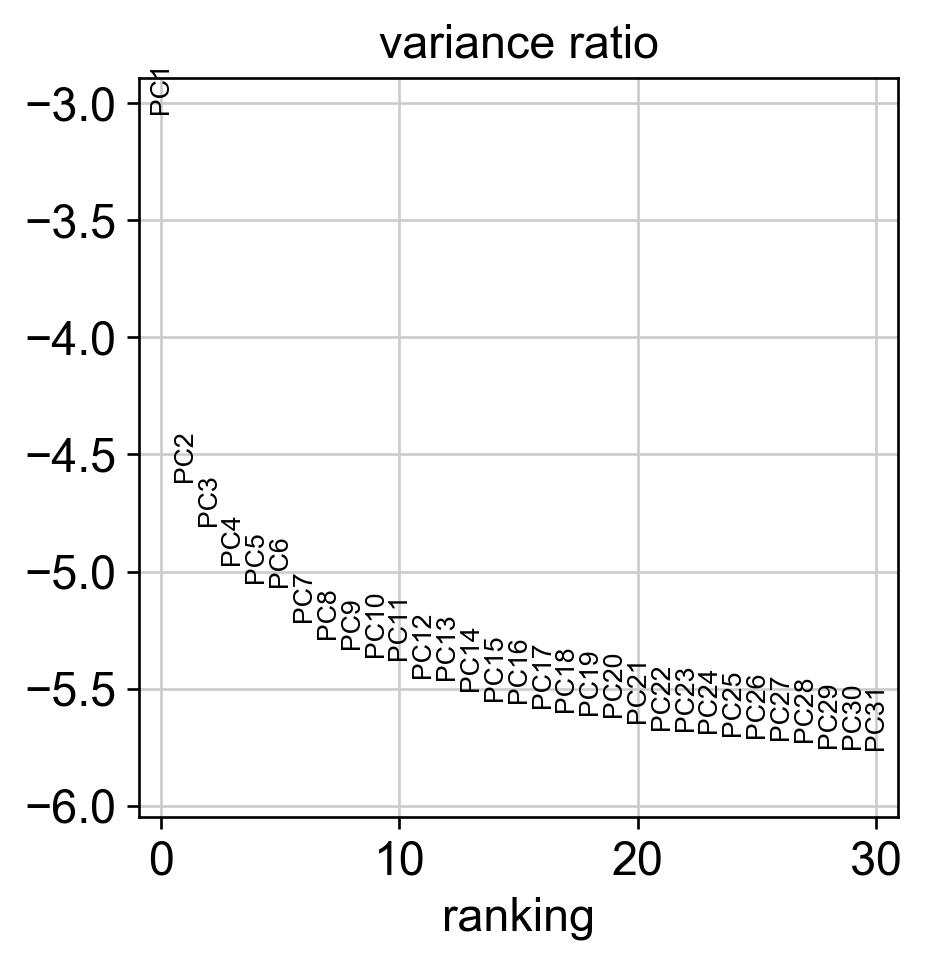

In [18]:
# have a look at pc's in order to choose number of pcs that will be used downstream 
sc.pl.pca_variance_ratio(adata, log=True)

In [19]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=10) 

In [20]:
# run umap
sc.tl.umap(adata) 

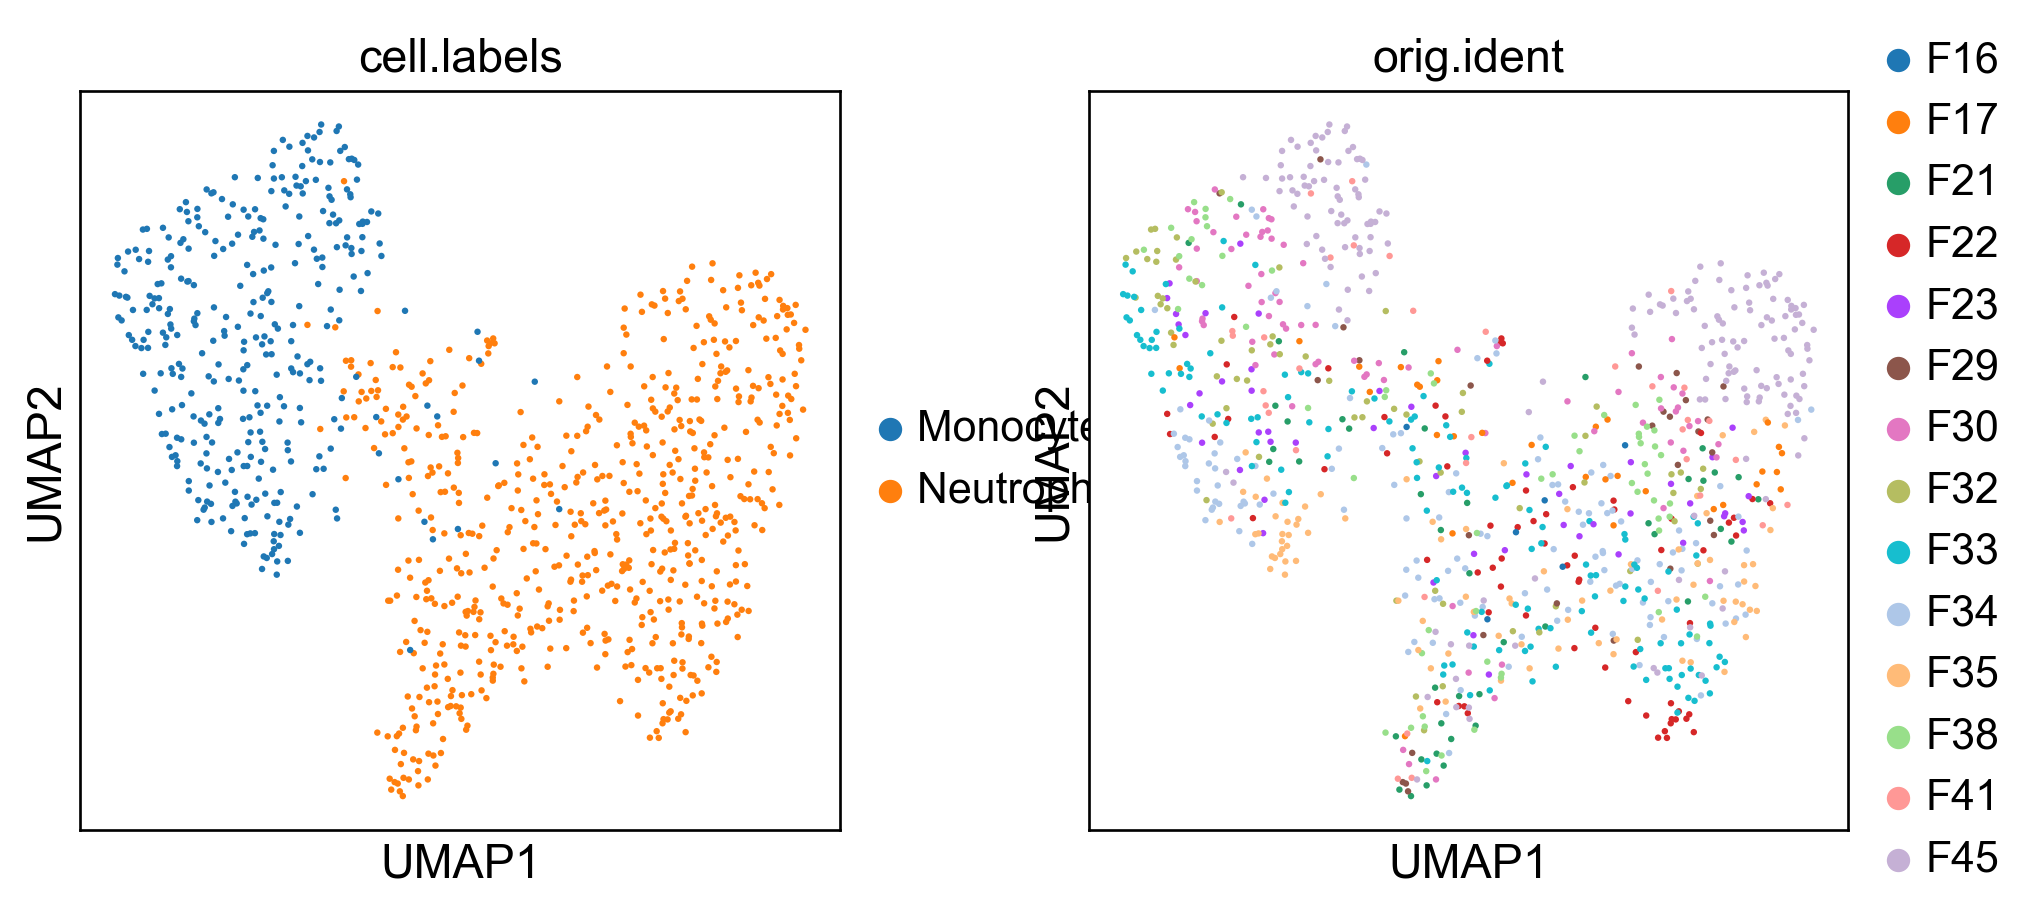

In [21]:
sc.pl.umap(adata, color=['cell.labels', 'orig.ident'], size=15) 

# Run harmony batch correction

In [22]:
#harmony prep - save pca and batch (sample) metadata columns 
pca = adata.obsm['X_pca']
batch = adata.obs['orig.ident']

In [23]:
# load up harmony in rpy2
%load_ext rpy2.ipython

In [24]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)

hem = HarmonyMatrix(pca, batch, theta=3, verbose=TRUE, do_pca=FALSE)
hem = data.frame(hem)

R[write to console]: Loading required package: Rcpp

R[write to console]: Harmony 1/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[


R[write to console]: Harmony 7/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write 

In [25]:
# save old pca values or orig.pca and save batch corrected pca results in anndata object as x_pca
adata.obsm['X_orig_pca'] = adata.obsm['X_pca']
adata.obsm['X_pca'] = hem.values

# Add dimensional reduction post-harmony

In [26]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=10) 

In [27]:
# run umap
sc.tl.umap(adata)

# Cluster the data

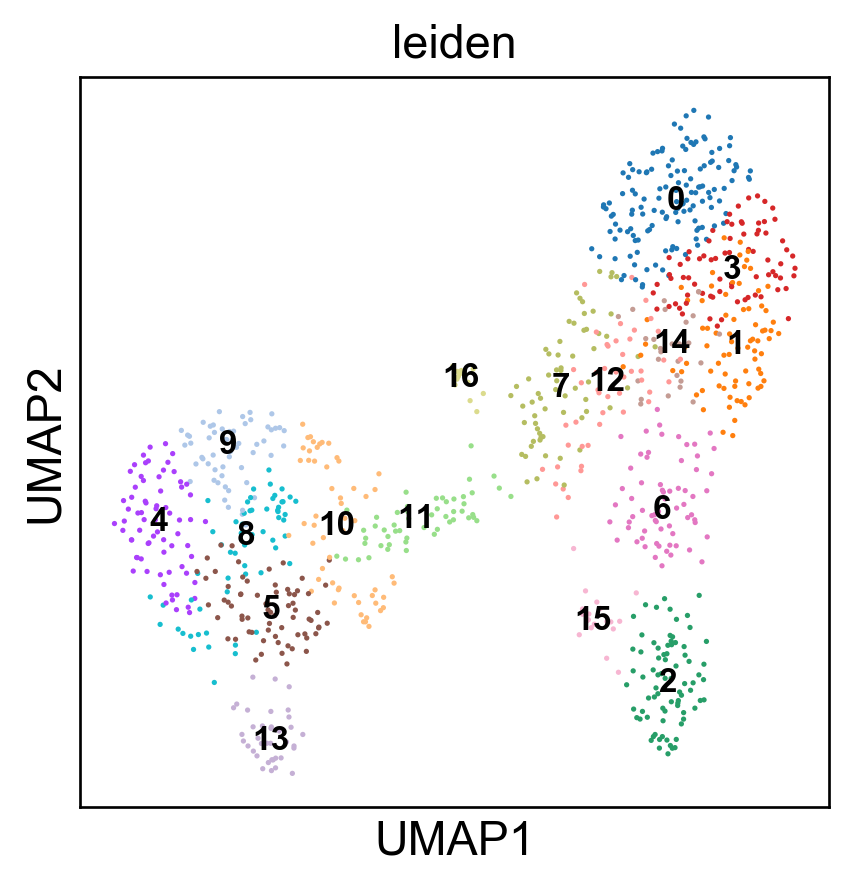

In [28]:
sc.tl.leiden(adata, resolution=2, random_state=26, n_iterations=-1) 
sc.pl.umap(adata, color='leiden', legend_loc="on data", size=10, legend_fontsize=10)

In [29]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
Monocyte precursor               350
Neutrophil-myeloid progenitor    658
dtype: int64

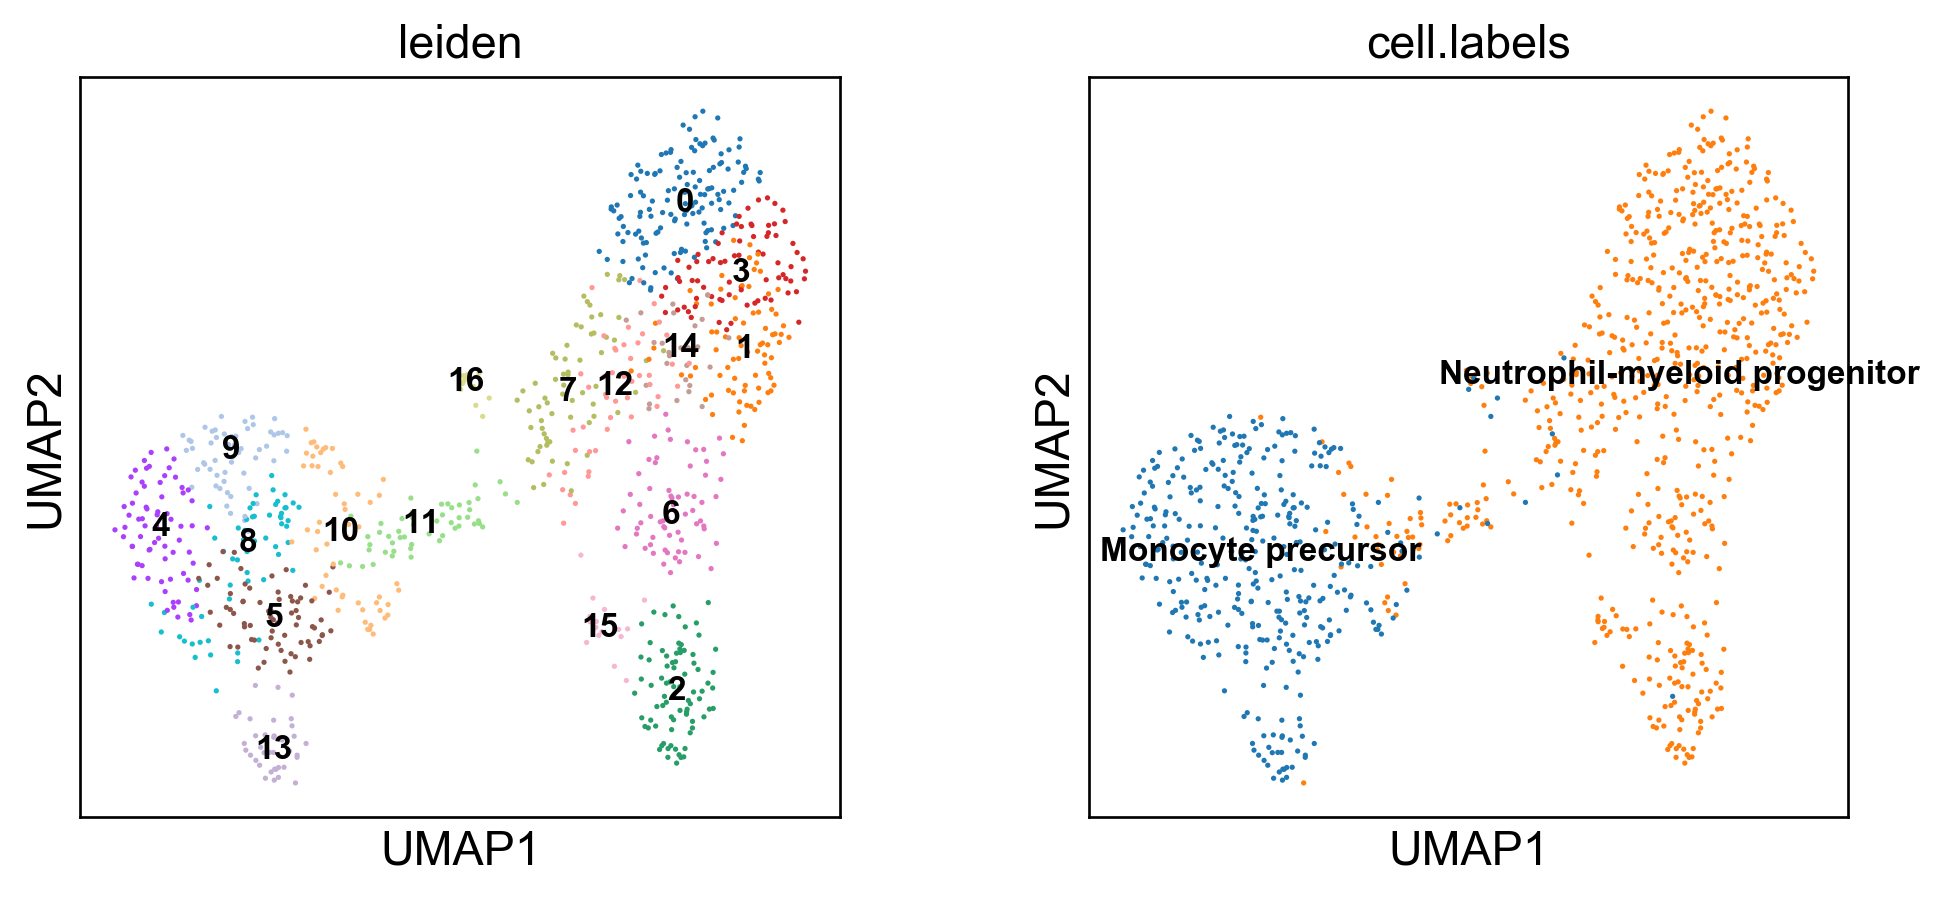

In [30]:
sc.pl.umap(adata, color=['leiden', 'cell.labels'], legend_loc="on data", size=10, legend_fontsize=10)

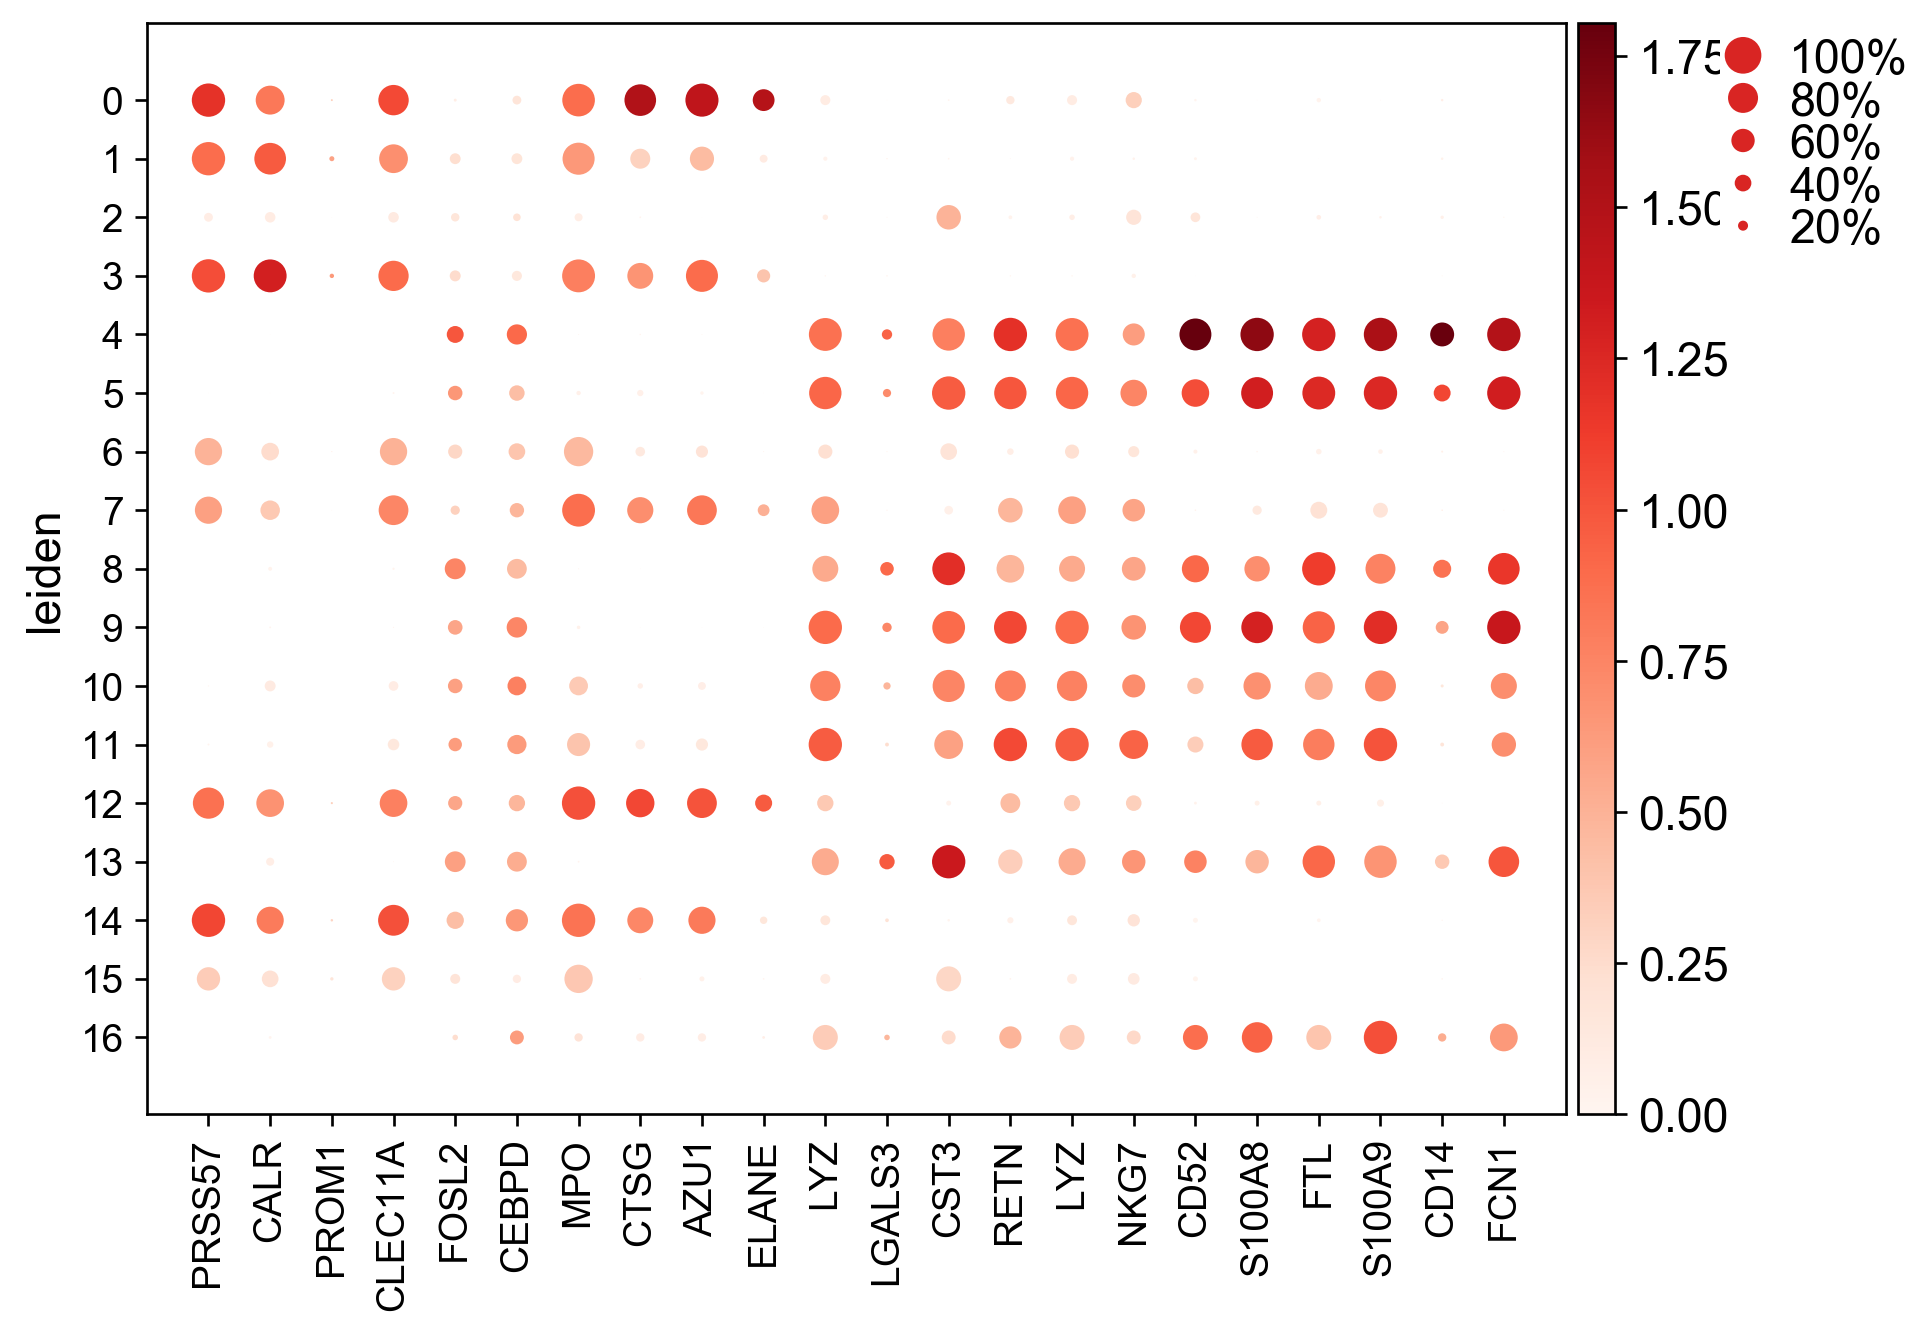

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[7.699999999999999, 0, 0.2, 0.5, 0.25])

In [31]:
genes = ['PRSS57', 'CALR', 'PROM1', 'CLEC11A', 'FOSL2', 'CEBPD', 'MPO', 'CTSG', 'AZU1', 'ELANE', 
                'LYZ', 'LGALS3', 'CST3', 'RETN', 'LYZ', 'NKG7', 'CD52',
                'S100A8', 'FTL', 'S100A9', 'CD14', 'FCN1']

sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.pl.dotplot(adata, var_names=genes, groupby="leiden", use_raw=False, 
              save="fl_myeloid_reannotation_dotplot_20200722.pdf")

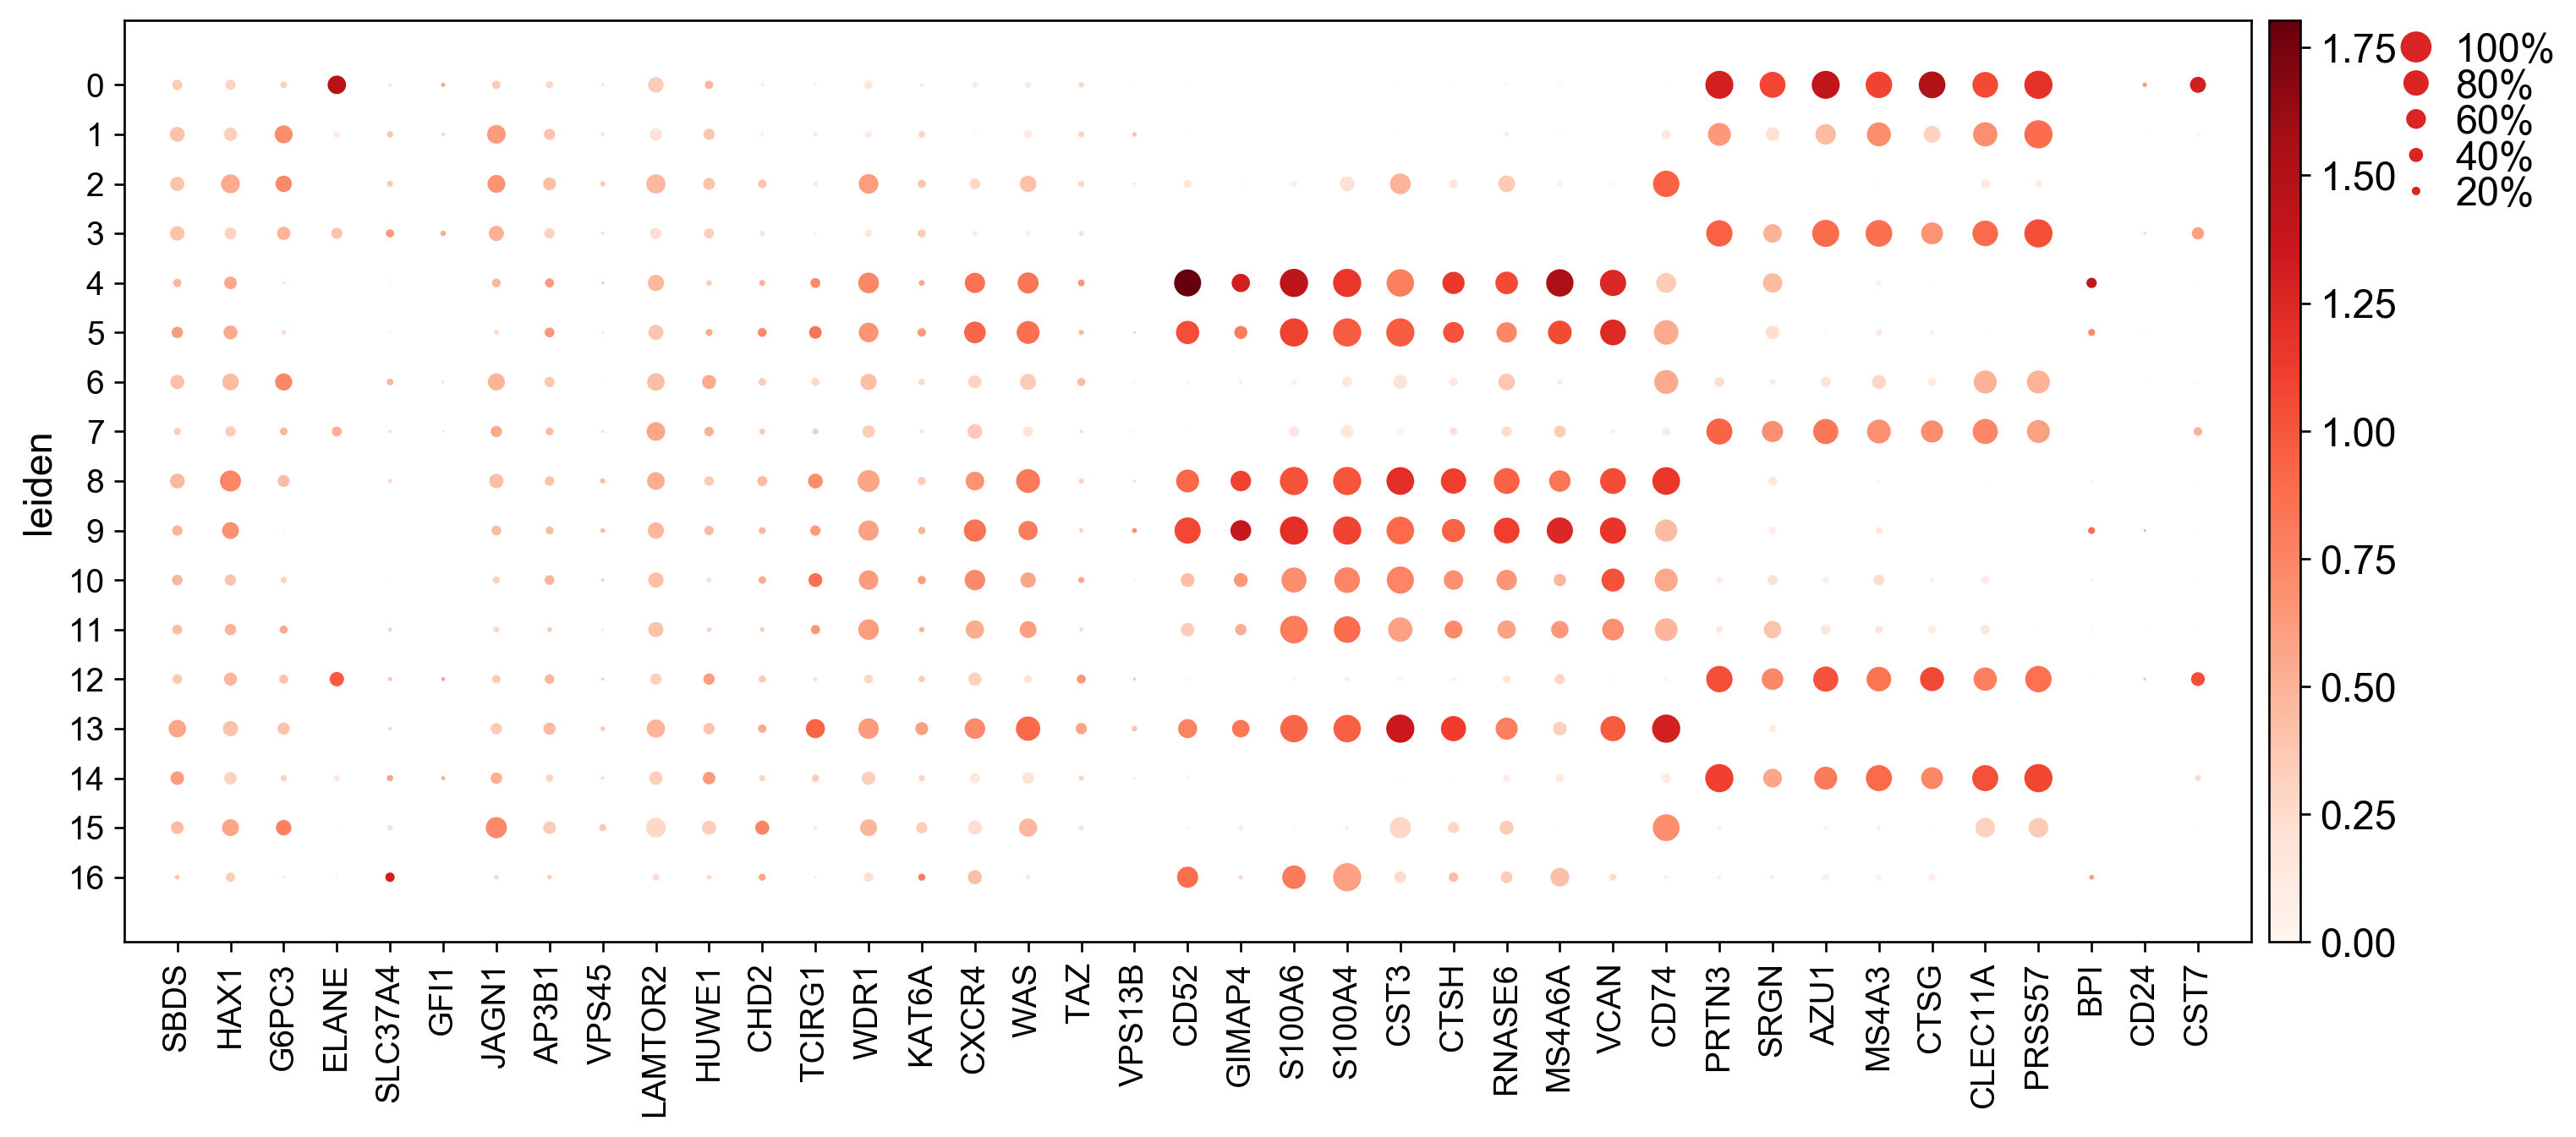

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[13.649999999999999, 0, 0.2, 0.5, 0.25])

In [32]:
genes = ['SBDS',
'HAX1',
'G6PC3',
'ELANE',
'SLC37A4',
'GFI1',
'JAGN1',
'AP3B1',
'VPS45',
'LAMTOR2',
'HUWE1',
'CHD2',
'TCIRG1',
'WDR1',
'KAT6A',
'CXCR4',
'WAS',
'TAZ',
'VPS13B', 
'CD52', # here are discrete premonocyte DEGs
'GIMAP4',
'S100A6',
'S100A4',
'CST3',
'CTSH',
'RNASE6',
'MS4A6A',
'VCAN',
'CD74',
# here are discrete promyelocyte DEGs
'PRTN3',
'SRGN',
'AZU1',
'MS4A3',
'CTSG',
'CLEC11A',
'PRSS57',
'BPI',
'CD24',
'CST7']

sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.pl.dotplot(adata, var_names=genes, groupby="leiden", use_raw=False, 
              save="fl_myeloid_reannotation_dotplot_20200722_nr2.pdf")

# Run DEGs

In [33]:
# run degs on normalised and logged data (saved as adata.raw), not on additionally scaled data (saved as adata.X).
# calculate degs using wilcoxon rank sum test with benjamini-hochberg correction. 
#based on ln transformed count data 
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon', use_raw=False, log_transformed=True)

In [34]:
# filter the degs for those which are expressed in at least 25% of cells in cluster. log2fc of the ln-transformed
# data will be shown.
sc.tl.filter_rank_genes_groups(adata, min_in_group_fraction=0.25, min_fold_change=0.25, use_raw=False)

In [35]:
# save df for unfiltered degs
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs_by_cluster = pd.DataFrame({group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges']})

# the degs_by_cluster df shows the log2 fold change for each gene ordered by z-score underlying the computation 
# of a p-value for each gene for each group
degs_by_cluster.to_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/figs/clustering_degs/fl_myeloid_degs_20200722.csv")
degs_by_cluster[:10]

,0_n,0_l,1_n,1_l,2_n,2_l,3_n,3_l,4_n,4_l,5_n,5_l,6_n,6_l,7_n,7_l,8_n,8_l,9_n,9_l,10_n,10_l,11_n,11_l,12_n,12_l,13_n,13_l,14_n,14_l,15_n,15_l,16_n,16_l
0,AZU1,3.201459,GNB2L1,2.565487,HMGA1,2.099956,IGLL1,3.630609,TYROBP,3.049497,FTL,2.455436,KCNE5,2.814976,MPO,1.425625,ANXA2,2.637359,LGALS1,2.353329,TMSB10,1.491952,LYZ,1.760950,MPO,1.757802,CST3,2.561866,PRSS57,1.781177,IRF8,2.660650,AHSP,6.188654
1,PRTN3,2.746191,EEF1A1,2.756852,ACY3,3.873944,CALR,2.764345,S100A9,3.003645,S100A9,2.347762,ACY3,3.613128,RPLP1,1.963131,CST3,2.333250,CENPF,2.899045,ACTR2,1.610839,RETN,1.933331,PRTN3,1.699028,CD74,2.541574,PRTN3,1.842322,ACY3,3.290420,HBG2,5.972542
2,PRSS57,2.434805,RPL5,2.297264,IRF8,3.098541,ITM2A,3.122094,S100A8,3.300939,FCN1,2.476815,C20orf27,1.532321,RPLP2,1.988124,CD74,2.303717,HMGB2,2.318837,SAMHD1,1.629670,S100A9,1.709950,RPL39,2.087443,HLA-DRA,2.508173,C1QTNF4,3.208253,CDC20,2.458331,BLVRB,5.532641
3,CTSG,3.644454,RPL4,2.253238,C12orf75,3.102941,EEF1A1,2.389498,S100A6,2.797413,S100A8,2.513574,FABP5,1.585091,APOA2,1.963627,TMSB10,2.109818,PTTG1,2.887954,VCAN,1.794471,TSPO,1.623615,RPS28,1.905117,HLA-DPA1,3.060913,CLEC11A,1.753523,TIFAB,3.836318,PRDX2,5.415585
4,RPS14,2.520370,RPS5,1.939587,PSME2,2.242531,RPL5,2.083326,NUP214,4.029429,PSAP,2.219955,PRMT1,1.768553,ALB,1.966424,B2M,2.261746,NUP214,2.908402,MKI67,1.700945,RP11-1143G9.4,1.995963,CTSG,2.033134,TMSB10,2.084538,RPL13A,1.527492,CENPF,2.083413,HBA1,5.376719
5,RPS27A,2.251940,EEF1B2,1.953080,TNNI2,3.346687,RPL3,1.944644,S100A12,4.373057,TYROBP,2.168511,RPS2,1.322581,HBG2,1.439614,CTSB,2.324940,TOP2A,2.764668,TOP2A,1.679278,DDT,1.735862,AZU1,1.757803,HLA-DPB1,2.937085,MPO,1.275721,NUCKS1,2.053406,HBG1,5.535089
6,RPL26,2.321857,RPL3,1.909251,SRP14,2.066408,RPL14,2.059101,FCER1G,2.811022,RRM2,2.809727,RANBP1,1.272980,RPL13,1.440279,HLA-B,2.097472,HN1,2.717931,SMC4,1.550382,S100A8,1.643079,VAMP8,1.487683,RRM2,2.421734,RPL27A,1.500976,UBE2C,2.109088,HBM,6.887042
7,RPL35A,2.317240,RPL14,1.988337,CD74,1.830958,RPS3,1.921992,S100A11,2.645952,S100A12,2.586556,CDK4,1.538072,RPL12,1.394362,IFI30,3.201049,FCN1,2.554492,HIST1H4C,1.526962,LGALS1,1.336120,SDF2L1,1.697499,ANXA2,2.233710,RPL30,1.498843,KCNE5,2.398057,KLF1,6.426748
8,RPS19,2.224862,EGFL7,2.330454,BIN1,3.694238,RPL7A,1.999833,HLA-B,2.744740,HIST1H4C,1.945252,PEBP1,1.383535,RPS19,1.471588,EMP3,1.992292,S100A6,2.226766,LYZ,1.224320,SERF2,1.728751,RPLP2,1.609450,TPI1,2.140929,RPL22L1,1.473397,CKS1B,1.676248,HBA2,5.390082
9,RPS24,2.459934,DLK1,3.013220,RANBP1,1.760516,NUCB2,2.090509,LGALS1,2.612981,S100A11,1.974637,NME4,1.506153,APOA1,1.899457,SH3BGRL3,2.035738,MNDA,2.324749,RP11-1143G9.4,1.579313,S100A4,1.493977,RPL37A,1.430050,DEK,2.172810,RP11-620J15.3,1.397734,TUBB4B,2.105169,GYPC,3.666890


In [36]:
# save df for filtered degs
result = adata.uns['rank_genes_groups_filtered']
groups = result['names'].dtype.names
degs_by_cluster_filtered = pd.DataFrame({group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges']})
# the degs_by_cluster df shows the log2 fold change for each gene ordered by z-score underlying the computation 
# of a p-value for each gene for each group
degs_by_cluster_filtered.to_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/figs/clustering_degs/fl_myeloid_degs_filtered_2020722.csv")
degs_by_cluster_filtered[:10]

,0_n,0_l,1_n,1_l,2_n,2_l,3_n,3_l,4_n,4_l,5_n,5_l,6_n,6_l,7_n,7_l,8_n,8_l,9_n,9_l,10_n,10_l,11_n,11_l,12_n,12_l,13_n,13_l,14_n,14_l,15_n,15_l,16_n,16_l
0,AZU1,3.201459,GNB2L1,2.565487,NaN,2.099956,IGLL1,3.630609,TYROBP,3.049497,FTL,2.455436,KCNE5,2.814976,NaN,1.425625,ANXA2,2.637359,NaN,2.353329,NaN,1.491952,NaN,1.760950,NaN,1.757802,NaN,2.561866,PRSS57,1.781177,IRF8,2.660650,NaN,6.188654
1,PRTN3,2.746191,EEF1A1,2.756852,ACY3,3.873944,CALR,2.764345,S100A9,3.003645,S100A9,2.347762,ACY3,3.613128,RPLP1,1.963131,NaN,2.333250,CENPF,2.899045,ACTR2,1.610839,RETN,1.933331,PRTN3,1.699028,NaN,2.541574,PRTN3,1.842322,ACY3,3.290420,NaN,5.972542
2,PRSS57,2.434805,NaN,2.297264,IRF8,3.098541,ITM2A,3.122094,S100A8,3.300939,FCN1,2.476815,C20orf27,1.532321,RPLP2,1.988124,NaN,2.303717,HMGB2,2.318837,SAMHD1,1.629670,S100A9,1.709950,RPL39,2.087443,NaN,2.508173,C1QTNF4,3.208253,CDC20,2.458331,NaN,5.532641
3,CTSG,3.644454,NaN,2.253238,C12orf75,3.102941,EEF1A1,2.389498,S100A6,2.797413,S100A8,2.513574,NaN,1.585091,APOA2,1.963627,NaN,2.109818,PTTG1,2.887954,VCAN,1.794471,TSPO,1.623615,RPS28,1.905117,HLA-DPA1,3.060913,NaN,1.753523,TIFAB,3.836318,NaN,5.415585
4,RPS14,2.520370,NaN,1.939587,NaN,2.242531,NaN,2.083326,NUP214,4.029429,PSAP,2.219955,PRMT1,1.768553,ALB,1.966424,B2M,2.261746,NUP214,2.908402,MKI67,1.700945,RP11-1143G9.4,1.995963,CTSG,2.033134,NaN,2.084538,NaN,1.527492,CENPF,2.083413,NaN,5.376719
5,NaN,2.251940,NaN,1.953080,TNNI2,3.346687,NaN,1.944644,S100A12,4.373057,TYROBP,2.168511,NaN,1.322581,NaN,1.439614,CTSB,2.324940,TOP2A,2.764668,TOP2A,1.679278,NaN,1.735862,AZU1,1.757803,HLA-DPB1,2.937085,NaN,1.275721,NaN,2.053406,HBG1,5.535089
6,RPL26,2.321857,NaN,1.909251,NaN,2.066408,NaN,2.059101,FCER1G,2.811022,RRM2,2.809727,NaN,1.272980,NaN,1.440279,HLA-B,2.097472,HN1,2.717931,SMC4,1.550382,S100A8,1.643079,NaN,1.487683,RRM2,2.421734,NaN,1.500976,UBE2C,2.109088,HBM,6.887042
7,RPL35A,2.317240,NaN,1.988337,NaN,1.830958,NaN,1.921992,S100A11,2.645952,S100A12,2.586556,NaN,1.538072,NaN,1.394362,IFI30,3.201049,FCN1,2.554492,HIST1H4C,1.526962,NaN,1.336120,NaN,1.697499,ANXA2,2.233710,NaN,1.498843,KCNE5,2.398057,KLF1,6.426748
8,RPS19,2.224862,EGFL7,2.330454,BIN1,3.694238,NaN,1.999833,HLA-B,2.744740,HIST1H4C,1.945252,NaN,1.383535,NaN,1.471588,EMP3,1.992292,S100A6,2.226766,NaN,1.224320,NaN,1.728751,RPLP2,1.609450,NaN,2.140929,NaN,1.473397,NaN,1.676248,NaN,5.390082
9,RPS24,2.459934,DLK1,3.013220,NaN,1.760516,NUCB2,2.090509,NaN,2.612981,S100A11,1.974637,NaN,1.506153,APOA1,1.899457,SH3BGRL3,2.035738,MNDA,2.324749,RP11-1143G9.4,1.579313,S100A4,1.493977,NaN,1.430050,NaN,2.172810,NaN,1.397734,TUBB4B,2.105169,NaN,3.666890


# Save the data

In [37]:
from scipy.sparse import csr_matrix
adata.X = sparse.csr_matrix(adata.X)

In [38]:
adata.X

<1008x27080 sparse matrix of type '<class 'numpy.float32'>'
	with 2444488 stored elements in Compressed Sparse Row format>

In [39]:
adata.raw.X

<1008x27080 sparse matrix of type '<class 'numpy.float32'>'
	with 2782347 stored elements in Compressed Sparse Row format>

In [40]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig2_fl_myeloid_reannotation_20200722.h5ad")

# Add in new annotations

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')
# silence NumbaPerformanceWarning
import warnings
from numba.errors import NumbaPerformanceWarning
warnings.filterwarnings("ignore", category=NumbaPerformanceWarning)

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig2_fl_myeloid_reannotation_20200722.h5ad")

In [5]:
# read in annotation.csv which contains: 'Cluster' column for leiden clusters and 'Category' column for annotations
annotation = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/FL_neut_myeloid_reannotation_20200727.csv", index_col=False)

In [6]:
# convert the clusters column to a string (so that it can be input into the replace function, which acts on strings)
annotation.Cluster = annotation.Cluster.apply(str)
# make a temp metadata column for new cell labels from the leiden clusters
adata.obs["cell.labels"] = adata.obs["leiden"]

In [7]:
# save the clusters/categories columns as named lists 
clusters = annotation["Cluster"].tolist()
categories = annotation["Category"].tolist()
# replace all values in new.cell.labels column matchin clusters values with categories values
adata.obs["cell.labels"] = adata.obs["cell.labels"].replace(clusters, categories)

... storing 'cell.labels' as categorical


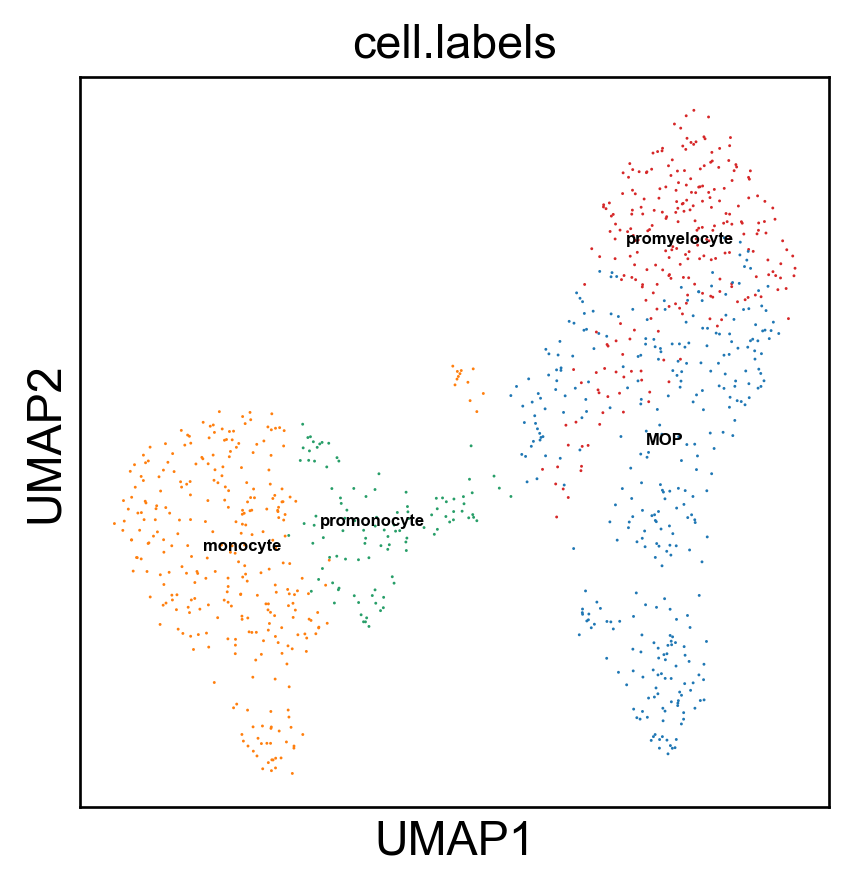

In [8]:
# lets look into proliferation..
sc.pl.umap(adata, color=["cell.labels"], legend_loc="on data", legend_fontsize=5, size=3)

In [9]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
MOP             337
monocyte        305
promonocyte     107
promyelocyte    259
dtype: int64

In [10]:
pd.DataFrame(adata.obs["cell.labels"]).to_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/resources_for_pipelines/fl_neut_myeloid_reannoatation_celltype_meta_20200727.csv")

In [11]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs/data/fig2_fl_myeloid_reannotation_20200722.h5ad")